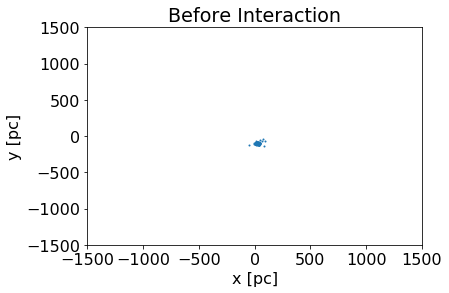

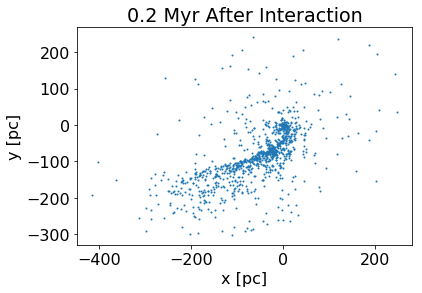

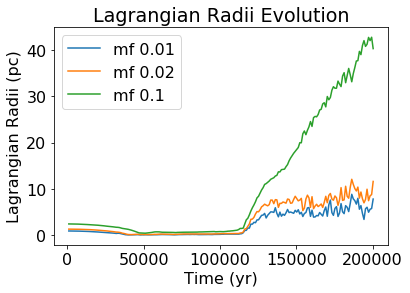

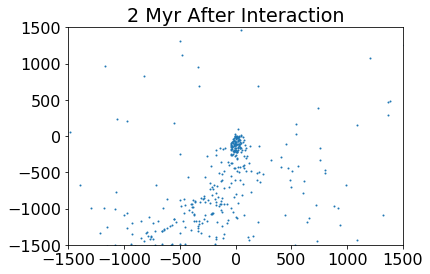

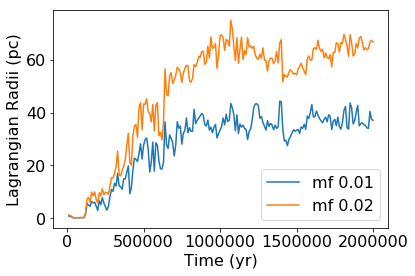

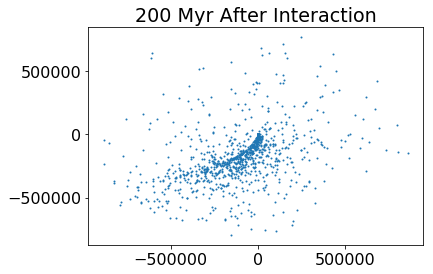

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import json
trial_name1 = '3000kms200kyr/'
trial_name2 = '3000kms2Myr/'
trial_name3 = '3000kms200Myr/'
with open('./Text/Cluster/'+trial_name1+'time.txt', 'r') as times1:  
    t = json.load(times1)
with open('./Text/Cluster/'+trial_name1+'oldx.txt', 'r') as oldx1:
    oldx = json.load(oldx1)
with open('./Text/Cluster/'+trial_name1+'oldy.txt', 'r') as oldy1:
    oldy = json.load(oldy1)
    
with open('./Text/Cluster/'+trial_name1+'newx.txt', 'r') as newx1:
    newx = json.load(newx1)
with open('./Text/Cluster/'+trial_name1+'newy_.txt', 'r') as newy1:
    newy = json.load(newy1)

with open('./Text/Cluster/'+trial_name1+'lr1.txt', 'r') as lagr1:  
    lr1 = json.load(lagr1)
with open('./Text/Cluster/'+trial_name1+'lr2.txt', 'r') as lagr2:  
    lr2 = json.load(lagr2)
with open('./Text/Cluster/'+trial_name1+'lr4.txt', 'r') as lagr4:  
    lr4 = json.load(lagr4) 
    
with open('./Text/Cluster/'+trial_name2+'newx.txt', 'r') as newx2:
    newx2 = json.load(newx2)
with open('./Text/Cluster/'+trial_name2+'newy_.txt', 'r') as newy2:
    newy2 = json.load(newy2)
with open('./Text/Cluster/'+trial_name2+'com.txt', 'r') as com2:
    com2 = json.load(com2)

    
#figure = plt.figure(figsize=(7,7))
#plt.rcParams.update({'font.size': 16})
#figure.add_subplot(1,1,1)
#ax = plt.gca()
#ax.minorticks_on()
#ax.locator_params(nbins=3)    

plt.figure()
plt.title('Before Interaction')
plt.xlabel('x [pc]')
plt.ylabel('y [pc]')
plt.xlim(-1500,1500)
plt.ylim(-1500,1500)
plt.scatter(oldx,oldy,s=1)
plt.show()

plt.figure()
plt.scatter(newx,newy,s=1)
plt.title('0.2 Myr After Interaction')
plt.xlabel('x [pc]')
plt.ylabel('y [pc]')

plt.show()

plt.figure()
plt.title('Lagrangian Radii Evolution')
plt.plot(t, lr1, label='mf 0.01')
plt.plot(t, lr2, label='mf 0.02')
plt.plot(t, lr4, label='mf 0.1')
plt.xlabel('Time (yr)')
plt.ylabel('Lagrangian Radii (pc)')
plt.legend()
plt.show()


plt.figure()
plt.title('2 Myr After Interaction')
plt.scatter(newx2,newy2,s=1)
plt.xlim(-1500,1500)
plt.ylim(-1500,1500)
plt.show()

with open('./Text/Cluster/'+trial_name2+'time.txt', 'r') as times2:  
    t2 = json.load(times2)
with open('./Text/Cluster/'+trial_name2+'lr1.txt', 'r') as lagr1_:  
    lr1 = json.load(lagr1_)
with open('./Text/Cluster/'+trial_name2+'lr2.txt', 'r') as lagr2_:  
    lr2 = json.load(lagr2_)
with open('./Text/Cluster/'+trial_name2+'lr4.txt', 'r') as lagr4_:  
    lr4 = json.load(lagr4_) 
plt.figure()
plt.plot(t2, lr1, label='mf 0.01')
plt.plot(t2, lr2, label='mf 0.02')
#plt.plot(t2, lr4, label='mf 0.1')
plt.xlabel('Time (yr)')
plt.ylabel('Lagrangian Radii (pc)')
plt.legend()
plt.show()

with open('./Text/Cluster/'+trial_name3+'newx.txt', 'r') as newx3:
    newx3 = json.load(newx3)
with open('./Text/Cluster/'+trial_name3+'newy_.txt', 'r') as newy3:
    newy3 = json.load(newy3)
plt.figure()
plt.title('200 Myr After Interaction')
plt.scatter(newx3,newy3,s=1)
#plt.xlim(-300000,300000)
#plt.ylim(-300000,300000)
plt.show()


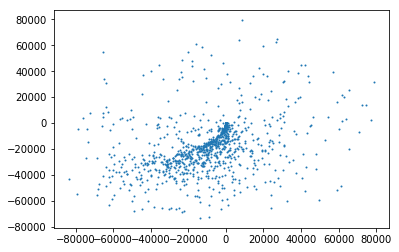

In [8]:
from amuse.lab import *
import matplotlib.pyplot as plt
cluster_set = read_set_from_file('./Text/Cluster_Trials/6pc/3000kms20Myr_end.hdf5',format='hdf5')
#print cluster_set
plt.scatter(cluster_set.x.value_in(units.parsec),cluster_set.y.value_in(units.parsec),s=1)
plt.show()

In [73]:
cluster_total_E = cluster_set.kinetic_energy() + cluster_set.potential_energy()
cluster_total_M = cluster_set.mass.sum()
conv = nbody_system.nbody_to_si(cluster_total_M, cluster_total_E)

hop = Hop(unit_converter=conv)

hop.number_of_neighbors_for_hop = 12
hop.relative_saddle_density_threshold = True
hop.set_relative_saddle_density_threshold(True)
hop.set_nHop(16)
print hop.parameters
hop.particles.add_particles(cluster_set)
hop.calculate_densities()
hop.do_hop()

n_groups = hop.get_number_of_groups()
print n_groups

CodeException: could not connect to worker, worker process terminated